# give a perfect Relu, let nn to learn

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


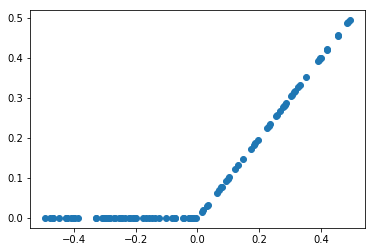

In [10]:
m = 100
train_X = np.random.random(m) - 0.5
train_y = [0 if x < 0 else x for x in train_X]
# print train_X, train_y
train_X = np.reshape(train_X, (m, 1))
train_y = np.reshape(train_y, (m, 1))

plt.plot(train_X, train_y, "o")

In [11]:
# build a model
X = tf.placeholder(tf.float32, shape=(None, 1), name = "input")
y = tf.placeholder(tf.float32, shape=(None, 1), name = "output")

W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

z = W * X + b

y_ = tf.nn.relu(z)


print the graph
weight 1.62668
bias -0.19711


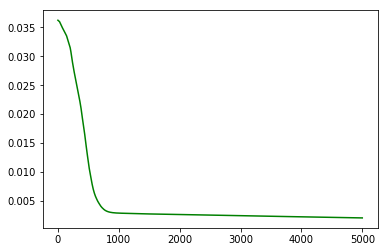

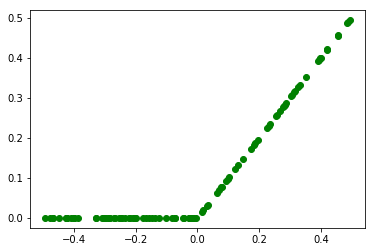

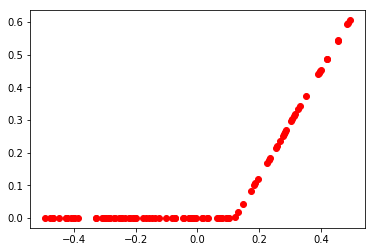

In [33]:
# fit
cost = tf.reduce_mean(tf.pow(y_ - y, 2))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

learning_paths = np.empty((0, 2))
costval = 0
epochs = 5000

# plt.subplots(2, 2)
plt.figure()

for epoch in range(epochs):
    sess.run(optimizer, feed_dict={X: train_X, y: train_y})
    costval = sess.run(cost, feed_dict={X: train_X, y:train_y})
    learning_paths = np.append(learning_paths, [[epoch, costval]], axis = 0)

# plt.subplot(2, 1, 1)
plt.plot(learning_paths[:, 0], learning_paths[:, 1], "g", label="cost by epoch")
[ weight, bias] = sess.run([W, b])
[ z_vals, y_vals] = sess.run([z, y_], feed_dict={X: train_X, y: train_y})

writer = tf.summary.FileWriter(str("simple"), sess.graph)
writer.close()
print "print the graph"

print "weight", weight
print "bias", bias

plt.show()

plt.figure()

# print the fit val
# plt.subplot(2, 1, 2)

plt.plot(train_X, train_y, "go")

plt.figure()
plt.plot(train_X, y_vals, "ro")
plt.show()